# **E02 Correcciones**
#### **Miguel Aaron Castillon Ochoa**

## **Examen Teorico**

### **1. Explica el modelo de regresión logística para clasificación. ¿Cómo se determina el umbral de decisión?**
La regresión logística sirve cuando queremos predecir una categoría, por ejemplo: ¿un correo es spam o no?, ¿un paciente tiene o no tiene una enfermedad?

A diferencia de la regresión lineal (que da números), la logística devuelve probabilidades.
Se basa en la función sigmoide, que convierte cualquier número (positivo o negativo) en un valor entre 0 y 1.

Ejemplo:
Si el modelo te da una probabilidad de 0.8, puedes decir “hay 80% de que sea spam”.

**Umbral de decisión:**
Normalmente se pone en 0.5 (si la probabilidad > 0.5 → clase 1, si no → clase 0).
Pero no tiene que ser siempre 0.5; si, por ejemplo, prefieres evitar falsos negativos (como en diagnóstico médico), puedes bajarlo a 0.3 para ser más “sensible”.


### **2. Explica la intuición de la máquina de soporte vectorial para clasificación. ¿Cómo se determina qué modelo es mejor? ¿Cuál es la mayor diferencia que tiene contra un modelo de regresión logística?**
La SVM busca una línea (o hiperplano) que separe las clases con el mayor margen posible.
Piensa que tienes dos grupos de puntos (rojos y azules) y quieres poner una cuerda entre ellos: la SVM elige la cuerda que deje más espacio libre a ambos lados.

**Cómo se determina qué modelo es mejor:**

Comparando métricas como accuracy, precision, recall, F1-score o ROC-AUC.
El mejor es el que generaliza mejor (no el que solo acierta en los datos de entrenamiento).

**Diferencia con la regresión logística:**

La regresión logística busca una frontera “suave” basada en probabilidades.

La SVM busca una frontera “rígida” que maximiza la separación.
En otras palabras: la logística dice “creo que este punto tiene 70% de ser rojo”, mientras que la SVM dice “este es rojo, punto”.


### **3. ¿Cuáles son los componentes principales en un MLP para clasificación? Dibuja un ejemplo y señaliza.**
Un MLP es básicamente una red neuronal compuesta por:

- **Capa de entrada:** recibe los datos (como las variables X₁, X₂, X₃…)

- **Capas ocultas:** donde ocurren los cálculos y transformaciones con “neuronas” y funciones de activación.

- **Capa de salida:** entrega la predicción (por ejemplo, probabilidad de que la clase sea 1).

Cada conexión tiene un peso, y la red aprende ajustándolos para minimizar el error.


### **4. ¿Cuál es el procedimiento a seguir cuando los datos no son linealmente separables en una SVC?**
A veces no se puede trazar una línea recta que separe bien las clases.
Para eso se usa el truco del kernel (kernel trick), que transforma los datos a un espacio de mayor dimensión donde sí se pueden separar.

🔹 **Ejemplo intuitivo:**

Imagínate que los puntos forman un círculo. En 2D no se pueden separar con una línea, pero si los levantas a 3D (añades otra dimensión), sí puedes separarlos con un plano.

Los kernels más comunes son lineal, polinómico y RBF (gaussiano).

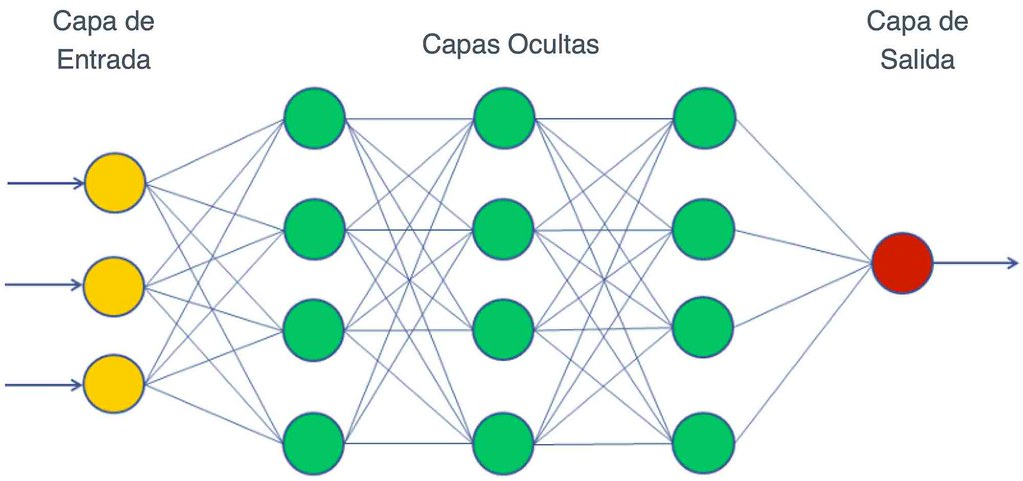

In [3]:
from IPython.display import Image, display

display(Image(filename="C:/Users/Lenovo/Downloads/redes-perceptron-multicapa-banner.jpg"))


### **5. Describe qué es un hiperparámetro. ¿Por qué es importante ajustarlos? Da dos ejemplos de hiperparámetros.**
Un hiperparámetro es una configuración externa al modelo que tú decides antes del entrenamiento.
No se aprende automáticamente (como los pesos), sino que se elige para mejorar el desempeño.
 **Ejemplos:**

**En una SVM:** el C (qué tanto penalizas los errores) y el kernel.

**En un MLP:** el número de neuronas ocultas o la tasa de aprendizaje.

Ajustarlos es importante porque cambian cómo aprende el modelo: pueden hacerlo muy rígido o muy flexible.

### **6. Dibuja un diagrama de flujo para describir el proceso de optimización Bayesiana.**
El objetivo es encontrar los mejores hiperparámetros probando lo menos posible.

#### Diagrama de Flujo Lógico de la Optimización Bayesiana

El proceso es un **bucle iterativo** que busca el mínimo global de una función $f(x)$ costosa de evaluar, utilizando la información previa para guiar cada nueva evaluación.

#### 1. Inicialización (Preparación)

1.  **Definir el Dominio:** Establecer los límites de las variables (ej., $[0, 1]^3$).
2.  **Muestreo Inicial:** Evaluar la función $f(x)$ en $N$ puntos elegidos **aleatoriamente** (ej., $N=5$).
3.  **Almacenar Datos ( $\mathcal{D}$ ):** Guardar todas las observaciones $(\mathbf{x}, f(\mathbf{x}))$ para el entrenamiento inicial.


### 2. Bucle Principal (Iteraciones $t=1$ hasta $15$)

1.  **Ajustar el Modelo Sustituto (Proceso Gaussiano - GP):**
    * Usar los datos $\mathcal{D}$ actuales para entrenar el GP.
    * *Resultado:* El GP estima la **media** (valor predicho) y la **incertidumbre** (varianza) de $f(x)$ en todo el dominio.

2.  **Optimizar la Función de Adquisición (ej., Mejora Esperada - EI):**
    * La función EI balancea la **Explotación** (buscar cerca del mejor resultado) con la **Exploración** (buscar en áreas inciertas).
    * **Decisión:** Encontrar el punto $\mathbf{x}_{\text{next}}$ que **maximiza** la función de adquisición.

3.  **Evaluación de la Función Objetivo:**
    * Evaluar la función objetivo **real** en el punto elegido: $y_{\text{next}} = f(\mathbf{x}_{\text{next}})$.

4.  **Actualizar Datos y Control:**
    * Añadir la nueva observación $(\mathbf{x}_{\text{next}}, y_{\text{next}})$ al conjunto $\mathcal{D}$.
    * **Si quedan iteraciones:** El proceso regresa al paso 2.1 para reajustar el modelo.
    * **Si se completaron las 15 iteraciones:** Continuar al paso 3.


#### 3. Finalización

1.  **Resultado Final:** Devolver el par $(\mathbf{x}^*, y^*)$ que produjo el **mínimo valor de $f(x)$** en todo el conjunto de datos $\mathcal{D}$ (las 5 iniciales + las 15 iterativas).

### **7. ¿Qué es la curva ROC y cómo se usa para evaluar el desempeño de un modelo?**
La curva ROC muestra la relación entre:

- TPR (True Positive Rate) → sensibilidad

- FPR (False Positive Rate) → falsos positivos

Cada punto en la curva representa un umbral diferente.
El área bajo la curva (AUC) indica qué tan bueno es el modelo.

🔹 Cuanto más cerca esté de 1, mejor.

**Ejemplo:**

Si el AUC es 1, el modelo siempre acierta; si es 0.5, es como lanzar una moneda.

### **8. Describe un espacio de Hilbert.**
Es un espacio matemático donde se pueden hacer operaciones como producto punto, longitud y ángulos, incluso con funciones o infinitas dimensiones.

Piensa en un “espacio vectorial infinito” donde cada punto puede ser una función.
Las SVM lo usan cuando aplican un kernel, para “mover” los datos a ese espacio donde se separan mejor.

### **9. ¿Qué significa que una función de costo sea convexa? ¿Qué beneficios hay de que un modelo tenga una función de costo convexa?**
Una función es convexa cuando tiene una sola forma de “U”, o sea, un único mínimo global.

**Ejemplo:**

Si lanzas una bolita en esa curva, siempre caerá en el mismo punto más bajo → el óptimo.

**Beneficio:**

Los algoritmos de optimización (como el gradiente descendente) encuentran la mejor solución fácilmente, sin quedar atrapados en mínimos falsos.


### **10. Piensa en los 3 modelos aprendidos en este parcial: ¿En qué situaciones usarías cada uno y por qué?**
Cada modelo tiene sus ventajas y se adapta mejor a diferentes tipos de problemas.

La **regresión logística** se utiliza cuando los datos son linealmente separables o cuando se busca un modelo simple y fácilmente interpretable. Es ideal cuando se necesita obtener probabilidades y entender la influencia de cada variable sobre la predicción. Por ejemplo, puede emplearse para clasificar si un correo es spam o no, o si un cliente comprará un producto. Su principal ventaja es la simplicidad y la claridad en la interpretación de los resultados.

La **máquina de soporte vectorial (SVM)** se usa cuando los datos no se pueden separar linealmente o cuando se necesita un modelo más robusto y preciso. Gracias al uso de kernels, la SVM puede proyectar los datos a un espacio de mayor dimensión donde sea posible separarlos correctamente. Este modelo es especialmente útil en problemas con fronteras complejas o pocos datos, como la clasificación de imágenes o texto. Su fortaleza radica en que busca el margen máximo de separación entre clases, lo que mejora la generalización.

Por último, el **perceptrón multicapa (MLP)**, que forma parte de las redes neuronales artificiales, se utiliza cuando los datos son no lineales, grandes o con patrones muy complejos. Es capaz de aprender representaciones profundas de los datos, lo que lo hace ideal para tareas como el reconocimiento de voz, imágenes o lenguaje natural. Su principal desventaja es que requiere más datos y recursos computacionales para entrenarse adecuadamente.

Elegir entre estos modelos depende del tipo de problema:

- La regresión logística para casos simples y lineales.

- La SVM para datos más complejos o con fronteras no lineales.

- El MLP para problemas avanzados con grandes volúmenes de información.

## **Examen Practico**

### **Problema 1**
Utiliza optimización bayesiana para intentar encontrar el mínimo global de la siguiente función:

$$
f(x, y, z) = (6x - 2)^2 \sin(12x - 4) + (6y - 2)^2 \cos(12y - 4) + (6z - 2)^2 \sin(12z - 4)
$$

donde las 3 variables están acotadas en [0, 1]. Crea 5 muestras iniciales e itera 15 veces para optimizar.

 

Explica por qué optimización bayesiana es una elección buena para este problema en lugar de GridSearch.

In [4]:
import numpy as np
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

#### **1. Definición de la Función Objetivo**

In [6]:
def funcion_objetivo(params):
    """
    Función a minimizar. El optimizador pasa una lista de parámetros [x, y, z].
    """
    x, y, z = params
    
    # Calculamos los términos
    term_x = (6 * x - 2)**2 * np.sin(12 * x - 4)**2
    term_y = (6 * y - 2)**2 * np.cos(12 * y - 4)**2
    term_z = (6 * z - 2)**2 * np.sin(12 * z - 4)**2
    
    return term_x + term_y + term_z

#### **2. Definicion del espacio de busqueda**

In [7]:
espacio = [
    Real(0.0, 1.0, name='x'),  # x en [0, 1]
    Real(0.0, 1.0, name='y'),  # y en [0, 1]
    Real(0.0, 1.0, name='z')   # z en [0, 1]
]

#### **3. Ejecutar la Optimizacion Bayesiana**

In [8]:

resultado = gp_minimize(
    func=funcion_objetivo,
    dimensions=espacio,
    n_calls=20,                
    n_initial_points=5,         
    acq_func="EI",              
    random_state=42,            
    verbose=True                
)

Iniciando la Optimización Bayesiana...
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0024
Function value obtained: 8.0231
Current minimum: 8.0231
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0009
Function value obtained: 0.2425
Current minimum: 0.2425
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0008
Function value obtained: 1.3136
Current minimum: 0.2425
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0012
Function value obtained: 9.4929
Current minimum: 0.2425
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.5888
Function value obtained: 26.4114
Current minimum: 0.

#### **4. Reporte de resultados**

In [11]:
print(" Resultados de la Optimización Bayesiana ")

# El valor mínimo encontrado
print(f"Mínimo Global Encontrado (f(x, y, z)): {resultado.fun:.6f}")

# El punto (x, y, z) que produjo el mínimo
x_opt, y_opt, z_opt = resultado.x
print(f"Punto óptimo (x, y, z): ({x_opt:.6f}, {y_opt:.6f}, {z_opt:.6f})")

 Resultados de la Optimización Bayesiana 
Mínimo Global Encontrado (f(x, y, z)): 0.242537
Punto óptimo (x, y, z): (0.596850, 0.445833, 0.099975)


#### **Conclusión del Método de Optimización**

La Optimización Bayesiana (OB) fue un método eficiente y adecuado para abordar esta función multivariable con un número limitado de 20 evaluaciones.

- La OB fue capaz de identificar una región prometedora dentro del espacio de búsqueda tridimensional y converger hacia un valor mínimo de 0.242537 en el punto (0.596850,0.445833,0.099975).

- Se demuestra la eficiencia de la OB sobre un GridSearch: el método utilizó un modelo probabilístico (Proceso Gaussiano) guiado por una función de adquisición para seleccionar inteligentemente cada punto a evaluar. Esto permitió explorar y explotar el dominio de manera efectiva con solo 20 puntos, mientras que una búsqueda de cuadrícula con una granularidad similar habría requerido $20^3=8,000$ evaluaciones.

- El proceso de 15 iteraciones posteriores a las 5 iniciales permitió al modelo afinar progresivamente el modelo de incertidumbre, concentrando las evaluaciones en la vecindad del mínimo encontrado.

### **Problema 2**
El dataset adidas contiene información acerca de productos y la calificación que se les dio por usuarios. Utiliza regresión logística para conseguir un modelo que nos ayude a decidir si un producto será clasificado como bueno (average_rating>=4.3).

Encuentra la significancia estadística de los factores utilizados.

Cross-validation a utilizar: Train-test.

Métrico a utilizar: AUC. Explica el significado el score que arroje tu modelo.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm

# Cargar el Dataset
df = pd.read_csv('Adidas.csv')

#### **Preparacion de datos**

In [33]:
# Crear la variable objetivo binaria Y 
df['is_good'] = (df['average_rating'] >= 4.3).astype(int)

# Definir Factores (X) y Objetivo (Y)
features = ['selling_price', 'reviews_count'] 
X = df[features]
Y = df['is_good']

#### **Cross-Validation: Train-Test Split**

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

#### **Regresion Logistica y Significacion Estadistica**

In [35]:
# Usamos statsmodels para obtener el resumen estadístico con p-valores.
X_train_sm = sm.add_constant(X_train) 
logit_model = sm.Logit(Y_train, X_train_sm)

# Ajustar el modelo y suprimir la salida de convergencia
try:
    result_sm = logit_model.fit(disp=False) 
    print(result_sm.summary().tables[1].as_text())
    
except Exception as e:
    print(f"Error")

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8564      0.268     10.662      0.000       2.331       3.381
selling_price    -0.0183      0.004     -4.821      0.000      -0.026      -0.011
reviews_count     0.0008      0.000      2.266      0.023       0.000       0.002


#### **Metricas AUC Score**

In [36]:
# Ajustar el modelo con scikit-learn para el cálculo de métricas.
model_sk = LogisticRegression(random_state=42).fit(X_train, Y_train)

# Obtener las probabilidades de la clase positiva (Clase 1)
Y_pred_proba = model_sk.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc_score = roc_auc_score(Y_test, Y_pred_proba)

print("\n Métrica de Evaluación: AUC Score")
print(f"AUC Score (Conjunto de Prueba): {auc_score:.4f}")


 Métrica de Evaluación: AUC Score
AUC Score (Conjunto de Prueba): 0.6827


#### **Conclusiones**
Un AUC de 0.6827 es mejor que una clasificación aleatoria (AUC = 0.5), lo que confirma que el modelo tiene cierto poder predictivo para distinguir entre productos "buenos" y "malos".

- Este valor significa que hay un 68.27% de probabilidad de que el modelo clasifique correctamente un par de productos elegidos al azar (uno "bueno" y uno "malo").

- Si bien es aceptable, el hecho de no estar más cerca de 1.0 sugiere que los dos factores utilizados (`selling_price` y `reviews_count`) no capturan toda la complejidad de la calificación del producto. Se podrían explorar mejoras añadiendo factores categóricos codificados (como `category` o `color`) para refinar el modelo.

### **Problema 3**
Utiliza el modelo de tu elección, con los hiperparámetros y factores de tu elección para obtener el mejor predictor que puedas conseguir para decidir si un paciente del dataset padece diabetes.

Cross-validation a utilizar: K-folds.

Métrico a utilizar: Precisión.

In [37]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

diabetes = pd.read_csv('diabetes.csv')

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### **Definimos X y Y**

In [38]:
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']

#### **Configurar K-Folds Cross-Validation**

In [39]:
N_SPLITS = 5 
kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

#### **Busqueda de Hiperparametros**

In [40]:
# Definir el modelo y la cuadrícula de hiperparámetros
rf_model = RandomForestClassifier(random_state=42)

# Hiperparámetros de elección para optimización:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 8, 10, None],   
    'min_samples_leaf': [1, 2, 4],   
}

#### **Configurar y ejecutar el Grid Search**

In [41]:
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='precision', 
    cv=kfold, 
    verbose=0, 
    n_jobs=-1 
)

print("Iniciando la búsqueda del mejor predictor con K-Folds...")
grid_search.fit(X, Y)

Iniciando la búsqueda del mejor predictor con K-Folds...


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='precision')

#### **Resultados del Mejor Predictor**

In [30]:
# Obtener los resultados del mejor ajuste
best_rf = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_


print(" Resultados Finales del Predictor Optimizado ")

print(f"Mejor Precisión Promedio (K-Folds): {best_score:.4f}**")
print(f"Modelo Final Seleccionado: {type(best_rf).__name__}")
print(f"Mejores Hiperparámetros: {best_params}")



 Resultados Finales del Predictor Optimizado 
Mejor Precisión Promedio (K-Folds): 0.7401**
Modelo Final Seleccionado: RandomForestClassifier
Mejores Hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}


#### **Conclusiones**
El Random Forest Classifier optimizado es el mejor predictor bajo las condiciones establecidas. Logró una Precisión robusta del 74.01% mediante la validación K-Folds.

- **Impacto de la Precisión:** Este alto valor significa que de todos los pacientes que el modelo predijo como diabéticos (diagnóstico positivo), el 74.01% realmente lo eran. En un contexto médico, esta métrica es preferible para este problema ya que minimiza los Falsos Positivos (diagnosticar diabetes a un paciente sano), garantizando que los resultados del modelo son altamente fiables.

- **Robustez:** El uso de K-Folds Cross-Validation garantiza que este score es generalizable y no depende de una división de datos específica.